<a href="https://colab.research.google.com/github/SergioSorianoS/CursoIA_Proyecto_Final/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Celda 1: Instalar librerías y dependencias
!pip install -q roboflow ultralytics pyyaml imageio==2.31.1 Pillow pandas seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3

In [2]:
# Celda 2: Configurar la API-KEY de Roboflow
import os

try:
    from google.colab import userdata
    api_key = userdata.get("API_KEY_RF")
except ImportError:
    api_key = None

if not api_key:
    api_key = os.getenv("API_KEY_RF")

if not api_key:
    raise ValueError("❌ Falta API_KEY_RF")

os.environ["ROBOFLOW_API_KEY"] = api_key
print("🔑 ROBOFLOW_API_KEY configurada correctamente")

🔑 ROBOFLOW_API_KEY configurada correctamente


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to project-warehouse-1 in yolov5pytorch:: 100%|██████████| 170/170 [00:00<00:00, 5144.60it/s]

✅ Box descargado desde https://universe.roboflow.com/nithesh-m-attgc/project-warehouse
loading Roboflow workspace...


loading Roboflow project...



Extracting Dataset Version Zip to suitcase-1 in yolov5pytorch:: 100%|██████████| 432/432 [00:00<00:00, 7630.50it/s]

✅ Suitcase descargado desde https://universe.roboflow.com/baggagedetection/suitcase-h38ut
loading Roboflow workspace...


loading Roboflow project...



Extracting Dataset Version Zip to box_polybag-1 in yolov5pytorch:: 100%|██████████| 14434/14434 [00:01<00:00, 7844.75it/s]

✅ polybag descargado desde https://universe.roboflow.com/yoloboxpolybag/box_polybag
loading Roboflow workspace...


loading Roboflow project...



Extracting Dataset Version Zip to instance-segmentation-1 in yolov5pytorch:: 100%|██████████| 642/642 [00:00<00:00, 6824.48it/s]


✅ box-cTJh descargado desde https://universe.roboflow.com/soman/instance-segmentation-u2vgh
📊 Gráfico guardado en: /content/visuals/class_distribution_all_splits.png


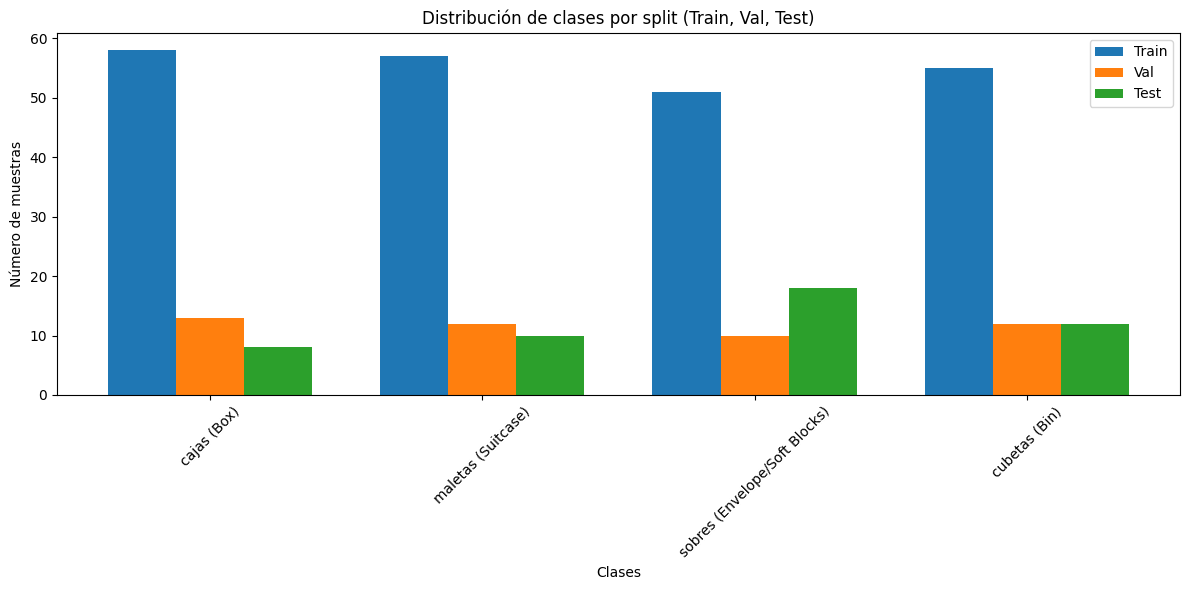


Resumen del dataset creado:
- Total imágenes: 316
- Train: 221 (70%)
- Val: 47 (15%)
- Test: 48 (15%)


In [3]:
# Celda 3: Descarga, preparación y balanceo de datasets (versión final con visualización guardada)
from roboflow import Roboflow
import yaml, random, shutil, os
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
import numpy as np
from collections import defaultdict

# Inicializar Roboflow
rf = Roboflow()

# Datasets por clase (con maletas actualizado a suitcase)
PROJS = [
    # cajas
    ("nithesh-m-attgc", "project-warehouse",
     "https://universe.roboflow.com/nithesh-m-attgc/project-warehouse",
     "Box"),

    # maletas (NUEVO)
    ("baggagedetection", "suitcase-h38ut",
     "https://universe.roboflow.com/baggagedetection/suitcase-h38ut",
     "Suitcase"),

    # sobres
    ("yoloboxpolybag", "box_polybag",
     "https://universe.roboflow.com/yoloboxpolybag/box_polybag",
     "polybag"),

    # cubetas
    ("soman", "instance-segmentation-u2vgh",
     "https://universe.roboflow.com/soman/instance-segmentation-u2vgh",
     "box-cTJh"),
]

CLASSES = [p[3] for p in PROJS]
NAMES = ["cajas (Box)", "maletas (Suitcase)", "sobres (Envelope/Soft Blocks)", "cubetas (Bin)"]

# Descargar datasets
datasets = []
for idx, (ws, slug, url, cls) in enumerate(PROJS):
    try:
        ds = rf.workspace(ws).project(slug).version(1).download("yolov5")
        datasets.append((ds.location, idx))
        print(f"✅ {cls} descargado desde {url}")
    except Exception as e:
        print(f"⚠️ Error descargando {cls}: {str(e)}")

# Crear estructura de directorios
BASE = "/content/combined_improved"
SPLITS = ["train", "val", "test"]
for split in SPLITS:
    os.makedirs(f"{BASE}/images/{split}", exist_ok=True)
    os.makedirs(f"{BASE}/labels/{split}", exist_ok=True)

# Recopilar y balancear datos
class_data = defaultdict(list)
for loc, cls_idx in datasets:
    for split in ("train", "valid", "val", "test"):
        img_dir = f"{loc}/{split}/images"
        lbl_dir = f"{loc}/{split}/labels"
        if os.path.isdir(img_dir) and os.path.isdir(lbl_dir):
            for img_name in os.listdir(img_dir):
                base = os.path.splitext(img_name)[0]
                src_img = f"{img_dir}/{img_name}"
                src_lbl = f"{lbl_dir}/{base}.txt"
                if os.path.isfile(src_lbl):
                    class_data[cls_idx].append((img_name, src_img, src_lbl, cls_idx))

# Balancear clases usando la clase con menos muestras como referencia
min_samples = min(len(v) for v in class_data.values()) if class_data else 0
balanced_data = []
for cls_idx, items in class_data.items():
    balanced_data.extend(random.sample(items, min(min_samples, len(items)) if min_samples > 0 else items))

# Dividir en train / val / test
random.shuffle(balanced_data)
train_cut = int(0.7 * len(balanced_data))
val_cut = train_cut + int(0.15 * len(balanced_data))

train_data = balanced_data[:train_cut]
val_data = balanced_data[train_cut:val_cut]
test_data = balanced_data[val_cut:]

# Copiar imágenes y etiquetas a la estructura final
def copy_files(data_list, split_name):
    for img_name, src_img, src_lbl, _ in data_list:
        base = os.path.splitext(img_name)[0]
        ext = os.path.splitext(img_name)[1]
        dest_img = f"{BASE}/images/{split_name}/{base}{ext}"
        dest_lbl = f"{BASE}/labels/{split_name}/{base}.txt"
        shutil.copy(src_img, dest_img)
        shutil.copy(src_lbl, dest_lbl)

copy_files(train_data, "train")
copy_files(val_data, "val")
copy_files(test_data, "test")

# Crear data.yaml
yaml.dump({
    "train": f"{BASE}/images/train",
    "val": f"{BASE}/images/val",
    "test": f"{BASE}/images/test",
    "nc": len(CLASSES),
    "names": NAMES
}, open(f"{BASE}/data.yaml", "w"))

# Visualización de la distribución por clase en train, val y test
import numpy as np
import matplotlib.pyplot as plt
import os

# Crear carpeta para gráficos si no existe
os.makedirs("/content/visuals", exist_ok=True)

# Contar ejemplos por clase y por split
train_counts = [len([x for x in train_data if x[3] == i]) for i in range(len(CLASSES))]
val_counts   = [len([x for x in val_data if x[3] == i]) for i in range(len(CLASSES))]
test_counts  = [len([x for x in test_data if x[3] == i]) for i in range(len(CLASSES))]

x = np.arange(len(CLASSES))  # posiciones para las clases
width = 0.25  # ancho de cada barra

plt.figure(figsize=(12, 6))
plt.bar(x - width, train_counts, width, label='Train')
plt.bar(x,         val_counts,   width, label='Val')
plt.bar(x + width, test_counts,  width, label='Test')

plt.xlabel("Clases")
plt.ylabel("Número de muestras")
plt.title("Distribución de clases por split (Train, Val, Test)")
plt.xticks(x, NAMES, rotation=45)
plt.legend()
plt.tight_layout()

# Guardar gráfico
output_path = "/content/visuals/class_distribution_all_splits.png"
plt.savefig(output_path)
print(f"📊 Gráfico guardado en: {output_path}")

# Mostrar y limpiar
plt.show()
plt.close()

# Resumen
print("\nResumen del dataset creado:")
print(f"- Total imágenes: {len(balanced_data)}")
print(f"- Train: {len(train_data)} ({len(train_data)/len(balanced_data):.0%})")
print(f"- Val: {len(val_data)} ({len(val_data)/len(balanced_data):.0%})")
print(f"- Test: {len(test_data)} ({len(test_data)/len(balanced_data):.0%})")


🔍 Analizando estructura de datasets...

📊 Distribución inicial por clase:
  box: 79 muestras
  suitcase: 210 muestras
  polybag: 7211 muestras
  box-cTJh: 315 muestras

⚖️ Creando dataset balanceado con 79 muestras por clase

📂 Preparando directorios balanceados...

✅ Dataset balanceado creado exitosamente!
📄 Archivo de configuración creado en: /content/perfectly_balanced/data.yaml

🚀 Iniciando entrenamiento del modelo...
Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/perfectly_balanced/data.yaml, epochs=50, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=yolov8n_balanced_50ep, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=

100%|██████████| 755k/755k [00:00<00:00, 14.2MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    752092  ultralytics.nn.modules.head.Detect           [4, [64, 128, 256]]           
Model summary: 129 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 685.4±373.2 MB/s, size: 30.4 KB)


train: Scanning /content/perfectly_balanced/labels/train... 376 images, 0 backgrounds, 0 corrupt: 100%|██████████| 376/376 [00:00<00:00, 1352.31it/s]

train: New cache created: /content/perfectly_balanced/labels/train.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 321, len(boxes) = 434. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 750.8±276.3 MB/s, size: 34.7 KB)


val: Scanning /content/perfectly_balanced/labels/val... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<00:00, 1850.17it/s]

val: New cache created: /content/perfectly_balanced/labels/val.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 68, len(boxes) = 100. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/yolov8n_balanced_50ep/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.014142135623730952' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/yolov8n_balanced_50ep
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G     0.8553      2.834      1.348         22        640: 100%|██████████| 24/24 [05:13<00:00, 13.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:28<00:00,  9.37s/it]

                   all         91        100    0.00375          1       0.55      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.8504      1.782      1.311         17        640: 100%|██████████| 24/24 [04:55<00:00, 12.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.61s/it]

                   all         91        100      0.749      0.239      0.617      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.8697      1.619      1.316         23        640: 100%|██████████| 24/24 [04:57<00:00, 12.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.58s/it]

                   all         91        100      0.624      0.738      0.744      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.9474      1.562      1.365         28        640: 100%|██████████| 24/24 [04:58<00:00, 12.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.34s/it]

                   all         91        100      0.703      0.733      0.716      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G     0.9204      1.363      1.315         20        640: 100%|██████████| 24/24 [05:01<00:00, 12.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.29s/it]

                   all         91        100      0.533      0.639      0.546      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.9297       1.47      1.343         14        640: 100%|██████████| 24/24 [04:55<00:00, 12.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.36s/it]

                   all         91        100      0.621      0.638      0.568      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.8823      1.325      1.312         21        640: 100%|██████████| 24/24 [04:57<00:00, 12.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.42s/it]

                   all         91        100      0.722      0.742      0.824      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.8966      1.292      1.324         16        640: 100%|██████████| 24/24 [05:01<00:00, 12.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.66s/it]

                   all         91        100      0.693      0.698      0.666      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.9136      1.225      1.334         24        640: 100%|██████████| 24/24 [04:53<00:00, 12.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.92s/it]

                   all         91        100      0.567      0.587      0.584      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      0.884       1.21      1.299         22        640: 100%|██████████| 24/24 [05:00<00:00, 12.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.33s/it]

                   all         91        100      0.772      0.853      0.834      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.8361      1.157       1.28         22        640: 100%|██████████| 24/24 [04:53<00:00, 12.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.31s/it]

                   all         91        100        0.9      0.863      0.931      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.8075      1.094      1.271         23        640: 100%|██████████| 24/24 [04:53<00:00, 12.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.42s/it]

                   all         91        100      0.808      0.843      0.845      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.8379      1.119      1.285         20        640: 100%|██████████| 24/24 [04:54<00:00, 12.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.44s/it]

                   all         91        100      0.905      0.828      0.894      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      0.822      1.065      1.276         24        640: 100%|██████████| 24/24 [04:58<00:00, 12.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.59s/it]

                   all         91        100      0.876      0.843      0.889      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.7694     0.9571      1.249         18        640: 100%|██████████| 24/24 [04:52<00:00, 12.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.29s/it]

                   all         91        100      0.885      0.878      0.895      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.7918     0.9078      1.235         22        640: 100%|██████████| 24/24 [04:52<00:00, 12.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.45s/it]

                   all         91        100      0.855       0.74       0.79      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.8055     0.9208       1.24         26        640: 100%|██████████| 24/24 [05:09<00:00, 12.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.29s/it]

                   all         91        100      0.858      0.862      0.898      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.7918     0.9745       1.26         15        640: 100%|██████████| 24/24 [05:02<00:00, 12.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.12s/it]

                   all         91        100      0.925      0.928       0.95      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.7621     0.9427      1.246         17        640: 100%|██████████| 24/24 [05:01<00:00, 12.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.10s/it]

                   all         91        100      0.876      0.878      0.909       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.7452     0.8549      1.192         22        640: 100%|██████████| 24/24 [05:06<00:00, 12.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.72s/it]

                   all         91        100      0.969      0.935       0.97      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.7222     0.8548      1.191         16        640: 100%|██████████| 24/24 [05:06<00:00, 12.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.87s/it]

                   all         91        100      0.925      0.953      0.962      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.7653      0.851       1.22         28        640: 100%|██████████| 24/24 [05:04<00:00, 12.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.95s/it]

                   all         91        100      0.968      0.911      0.979      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.7402     0.8602      1.227         39        640: 100%|██████████| 24/24 [05:05<00:00, 12.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.31s/it]

                   all         91        100      0.967      0.942      0.979      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.6967      0.834      1.206         22        640: 100%|██████████| 24/24 [05:04<00:00, 12.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.64s/it]

                   all         91        100      0.959      0.958      0.975      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.6609     0.7886      1.167         24        640: 100%|██████████| 24/24 [05:04<00:00, 12.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.76s/it]

                   all         91        100      0.832      0.826      0.857      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.6836     0.7566      1.185         17        640: 100%|██████████| 24/24 [05:03<00:00, 12.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.75s/it]

                   all         91        100      0.963      0.954      0.979      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.6608     0.7453      1.155         21        640: 100%|██████████| 24/24 [04:55<00:00, 12.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.74s/it]

                   all         91        100      0.984      0.847      0.945      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.6812     0.7533      1.175         24        640: 100%|██████████| 24/24 [04:59<00:00, 12.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.79s/it]

                   all         91        100      0.912      0.947      0.967      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.7009     0.7745      1.205         30        640: 100%|██████████| 24/24 [05:14<00:00, 13.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.78s/it]

                   all         91        100      0.943      0.911      0.969      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.6754     0.7105      1.163         19        640: 100%|██████████| 24/24 [05:04<00:00, 12.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.82s/it]

                   all         91        100      0.959      0.961      0.983      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      0.657     0.7105      1.167         22        640: 100%|██████████| 24/24 [05:03<00:00, 12.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.08s/it]

                   all         91        100      0.986      0.947      0.985      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.6346      0.689      1.159         25        640: 100%|██████████| 24/24 [05:09<00:00, 12.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.17s/it]

                   all         91        100      0.947      0.947      0.969      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.6313     0.7277      1.151         22        640: 100%|██████████| 24/24 [05:02<00:00, 12.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.08s/it]

                   all         91        100      0.975      0.948       0.99      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.5923     0.7015       1.13         26        640: 100%|██████████| 24/24 [05:05<00:00, 12.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.19s/it]

                   all         91        100      0.933      0.928      0.983      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.5855     0.6538      1.123         25        640: 100%|██████████| 24/24 [05:03<00:00, 12.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.95s/it]

                   all         91        100      0.969      0.942      0.982      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.6303     0.6789       1.15         28        640: 100%|██████████| 24/24 [05:06<00:00, 12.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.97s/it]

                   all         91        100      0.944      0.956      0.969      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.5983     0.6624      1.134         23        640: 100%|██████████| 24/24 [05:01<00:00, 12.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.09s/it]

                   all         91        100      0.943      0.962      0.965      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.6207     0.6742      1.132         17        640: 100%|██████████| 24/24 [05:02<00:00, 12.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.15s/it]

                   all         91        100      0.966      0.983      0.992       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.6088     0.6394      1.132         24        640: 100%|██████████| 24/24 [05:02<00:00, 12.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:29<00:00,  9.81s/it]

                   all         91        100      0.991      0.952      0.989      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.5979     0.6104      1.135         22        640: 100%|██████████| 24/24 [05:29<00:00, 13.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.96s/it]

                   all         91        100      0.975      0.937      0.979        0.9


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.4261     0.5728      1.058          8        640: 100%|██████████| 24/24 [04:59<00:00, 12.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.16s/it]

                   all         91        100      0.957      0.968      0.991      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.4157      0.551      1.037          8        640: 100%|██████████| 24/24 [04:58<00:00, 12.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.24s/it]

                   all         91        100      0.978      0.989      0.993       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.4184     0.5349      1.039         11        640: 100%|██████████| 24/24 [05:01<00:00, 12.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:28<00:00,  9.40s/it]

                   all         91        100      0.988      0.987      0.994      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.3993     0.4761      1.026          8        640: 100%|██████████| 24/24 [05:04<00:00, 12.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.10s/it]

                   all         91        100      0.993       0.98      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.3913      0.457      1.019          8        640: 100%|██████████| 24/24 [05:02<00:00, 12.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.13s/it]

                   all         91        100      0.953          1      0.994      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.3541     0.4296     0.9751          8        640: 100%|██████████| 24/24 [04:58<00:00, 12.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.75s/it]

                   all         91        100      0.983      0.978      0.994      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.3638     0.4218     0.9915          8        640: 100%|██████████| 24/24 [04:58<00:00, 12.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.09s/it]

                   all         91        100      0.973      0.989      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.3571     0.4501     0.9875         11        640: 100%|██████████| 24/24 [05:01<00:00, 12.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:28<00:00,  9.38s/it]

                   all         91        100      0.955      0.997      0.993      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.3462     0.4188     0.9667         13        640: 100%|██████████| 24/24 [04:53<00:00, 12.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.05s/it]

                   all         91        100      0.985      0.978      0.994      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.3381      0.406      0.995          8        640: 100%|██████████| 24/24 [05:03<00:00, 12.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.03s/it]

                   all         91        100      0.962      0.999      0.993      0.931



50 epochs completed in 4.566 hours.
Optimizer stripped from runs/detect/yolov8n_balanced_50ep/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8n_balanced_50ep/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n_balanced_50ep/weights/best.pt...
Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:58<00:00, 19.42s/it]


                   all         91        100      0.994      0.973      0.994      0.954
                   box         22         30      0.984      0.967      0.994      0.963
              suitcase         26         26      0.995          1      0.995      0.995
               polybag         17         18          1      0.924      0.992      0.863
              box-cTJh         26         26      0.995          1      0.995      0.995
Speed: 8.4ms preprocess, 614.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/yolov8n_balanced_50ep

🧪 Evaluando modelo en conjunto de prueba...
Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 8.2±5.2 MB/s, size: 25.7 KB)


val: Scanning /content/perfectly_balanced/labels/test... 90 images, 2 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 608.57it/s]

val: New cache created: /content/perfectly_balanced/labels/test.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 75, len(boxes) = 103. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:53<00:00,  8.98s/it]


                   all         90        103      0.968      0.999      0.989       0.95
                   box         18         32      0.952          1      0.994      0.937
              suitcase         24         24          1          1      0.995      0.995
               polybag         23         24          1      0.998      0.995      0.899
              box-cTJh         23         23       0.92          1      0.971      0.971
Speed: 2.6ms preprocess, 583.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/yolov8n_balanced_50ep2

📁 Gráfico de métricas guardado en: /content/visuals/Metricas_por_clase.png


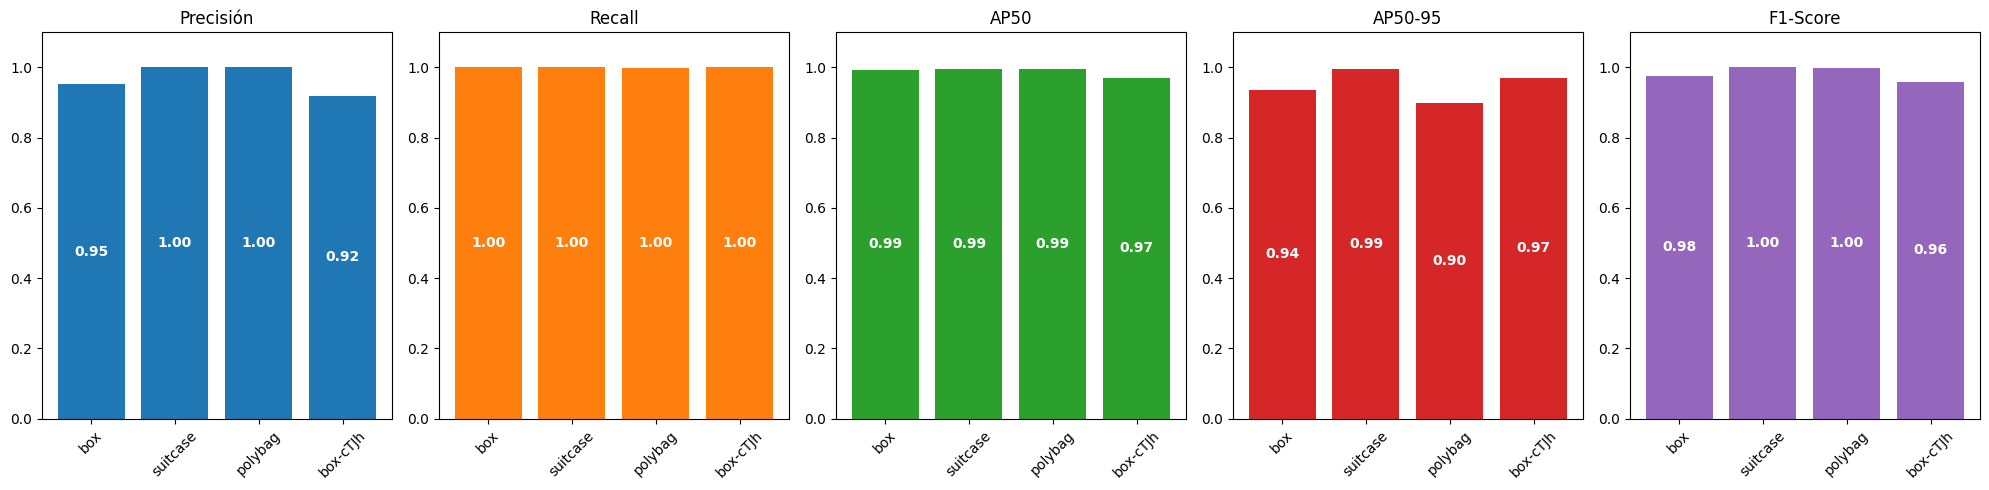


📜 Reporte final por clase:

box:
  Precisión: 0.9516
  Recall:    1.0000
  AP50:      0.9941
  AP50-95:   0.9369
  F1-Score:  0.9752

suitcase:
  Precisión: 1.0000
  Recall:    1.0000
  AP50:      0.9950
  AP50-95:   0.9950
  F1-Score:  1.0000

polybag:
  Precisión: 1.0000
  Recall:    0.9976
  AP50:      0.9950
  AP50-95:   0.8987
  F1-Score:  0.9988

box-cTJh:
  Precisión: 0.9200
  Recall:    1.0000
  AP50:      0.9709
  AP50-95:   0.9709
  F1-Score:  0.9583

✅ Entrenamiento completado exitosamente en 50 épocas!


In [5]:
# Celda 4: Entrenamiento con Balanceo Exacto Garantizado (versión compatible YOLOv8)
import torch
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import random
import shutil
import yaml
from collections import defaultdict
from sklearn.model_selection import train_test_split

# ======================
# CONFIGURACIÓN PRINCIPAL
# ======================
EPOCHS = 50 #10
MIN_SAMPLES_PER_CLASS = 20

# ======================
# 1. Configuración derivada
IMG_SIZE = 640 #320
BATCH_SIZE = 16
BASE_BALANCED = "/content/perfectly_balanced"
PATIENCE = max(4, int(EPOCHS*0.3))
LR0 = 0.01 * (100/max(EPOCHS, 1))**0.5

# Mapeo de clases por índice de dataset
DATASET_CLASS_MAPPING = {
    0: "box",
    1: "suitcase",
    2: "polybag",
    3: "box-cTJh"
}

# 2. Cargar y validar muestras
def load_and_validate_samples(datasets):
    dataset_counts = defaultdict(int)
    dataset_files = defaultdict(list)

    for dataset_idx, (dataset_path, _) in enumerate(datasets):
        assigned_class = DATASET_CLASS_MAPPING.get(dataset_idx)
        if assigned_class is None:
            continue

        for split in ["train", "valid", "test"]:
            lbl_dir = os.path.join(dataset_path, split, "labels")
            img_dir = os.path.join(dataset_path, split, "images")

            if not os.path.exists(lbl_dir) or not os.path.exists(img_dir):
                continue

            for lbl_file in os.listdir(lbl_dir):
                if lbl_file.endswith('.txt'):
                    base_name = os.path.splitext(lbl_file)[0]
                    img_file = base_name + '.jpg'
                    img_path = os.path.join(img_dir, img_file)
                    lbl_path = os.path.join(lbl_dir, lbl_file)

                    if os.path.exists(img_path):
                        dataset_counts[assigned_class] += 1
                        dataset_files[assigned_class].append((img_path, lbl_path))

    return dataset_counts, dataset_files

print("🔍 Analizando estructura de datasets...")
dataset_counts, dataset_files = load_and_validate_samples(datasets)

print("\n📊 Distribución inicial por clase:")
for class_name, count in dataset_counts.items():
    print(f"  {class_name}: {count} muestras")

valid_classes = [c for c, count in dataset_counts.items() if count >= MIN_SAMPLES_PER_CLASS]
if not valid_classes:
    raise ValueError("\n❌ No hay suficientes muestras para ninguna clase válida")

samples_per_class = min(dataset_counts[c] for c in valid_classes)
print(f"\n⚖️ Creando dataset balanceado con {samples_per_class} muestras por clase")

balanced_samples = []
for class_name in valid_classes:
    balanced_samples.extend(random.sample(dataset_files[class_name], samples_per_class))

# 4. Crear splits balanceados
def create_balanced_splits(data, val_pct=0.15, test_pct=0.15):
    random.shuffle(data)
    n_test = int(len(data) * test_pct)
    n_val = int(len(data) * val_pct)
    return data[n_test+n_val:], data[n_test:n_test+n_val], data[:n_test]

train, val, test = create_balanced_splits(balanced_samples)

# 5. Preparar directorios
print("\n📂 Preparando directorios balanceados...")
os.makedirs(BASE_BALANCED, exist_ok=True)

class_idx = {name: i for i, name in enumerate(valid_classes)}

for split_name, split_data in [("train", train), ("val", val), ("test", test)]:
    img_dir = os.path.join(BASE_BALANCED, "images", split_name)
    lbl_dir = os.path.join(BASE_BALANCED, "labels", split_name)
    os.makedirs(img_dir, exist_ok=True)
    os.makedirs(lbl_dir, exist_ok=True)

    for img_path, lbl_path in split_data:
        try:
            img_dest = os.path.join(img_dir, os.path.basename(img_path))
            shutil.copy2(img_path, img_dest)

            lbl_dest = os.path.join(lbl_dir, os.path.basename(lbl_path))
            with open(lbl_path) as f_in, open(lbl_dest, 'w') as f_out:
                for line in f_in:
                    parts = line.strip().split()
                    if len(parts) >= 5:
                        dataset_idx = next((i for i, (p, _) in enumerate(datasets) if p in img_path), -1)
                        if dataset_idx in DATASET_CLASS_MAPPING:
                            parts[0] = str(class_idx[DATASET_CLASS_MAPPING[dataset_idx]])
                            f_out.write(" ".join(parts) + "\n")
        except Exception as e:
            print(f"⚠️ Error procesando {img_path}: {str(e)}")

# 6. YAML
yaml_content = {
    "train": os.path.join(BASE_BALANCED, "images", "train"),
    "val": os.path.join(BASE_BALANCED, "images", "val"),
    "test": os.path.join(BASE_BALANCED, "images", "test"),
    "nc": len(valid_classes),
    "names": valid_classes
}

yaml_path = os.path.join(BASE_BALANCED, "data.yaml")
with open(yaml_path, 'w') as f:
    yaml.dump(yaml_content, f, sort_keys=False)

print("\n✅ Dataset balanceado creado exitosamente!")
print(f"📄 Archivo de configuración creado en: {yaml_path}")

# 7. Entrenamiento
print("\n🚀 Iniciando entrenamiento del modelo...")
model = YOLO("yolov8n.pt")

results = model.train(
    data=yaml_path,
    epochs=EPOCHS,
    imgsz=IMG_SIZE,
    batch=BATCH_SIZE,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    patience=PATIENCE,
    augment=True,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    translate=0.1,
    scale=0.5,
    flipud=0.1,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.1,
    name=f'yolov8n_balanced_{EPOCHS}ep',
    lr0=LR0,
    weight_decay=0.0005,
    box=8.0,
    close_mosaic=10
)

# 8. Evaluación
print("\n🧪 Evaluando modelo en conjunto de prueba...")
metrics = model.val(
    data=yaml_path,
    split='test',
    conf=0.1,
    iou=0.4
)

# 9. Gráfico y guardado de métricas

def plot_and_save_metrics(metrics, class_names, save_path):
    metrics_data = np.zeros((len(class_names), 5))

    if hasattr(metrics.box, 'ap_class_index'):
        for i, cls_idx in enumerate(metrics.box.ap_class_index):
            if cls_idx < len(class_names):
                metrics_data[cls_idx, 0] = metrics.box.p[i] if i < len(metrics.box.p) else 0
                metrics_data[cls_idx, 1] = metrics.box.r[i] if i < len(metrics.box.r) else 0
                metrics_data[cls_idx, 2] = metrics.box.ap50[i] if i < len(metrics.box.ap50) else 0
                metrics_data[cls_idx, 3] = metrics.box.ap[i] if i < len(metrics.box.ap) else 0
                metrics_data[cls_idx, 4] = metrics.box.f1[i] if hasattr(metrics.box, 'f1') and i < len(metrics.box.f1) else 0

    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    plt.figure(figsize=(20, 5))
    metric_names = ['Precisión', 'Recall', 'AP50', 'AP50-95', 'F1-Score']

    for i in range(5):
        plt.subplot(1, 5, i+1)
        bars = plt.bar(class_names, metrics_data[:, i], color=plt.cm.tab10(i))
        plt.title(metric_names[i])
        plt.ylim(0, 1.1)
        plt.xticks(rotation=45)

        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height/2,
                     f"{height:.2f}",
                     ha='center', va='center', color='white', fontweight='bold')

    plt.tight_layout()
    plt.savefig(save_path)
    print(f"\n📁 Gráfico de métricas guardado en: {save_path}")
    plt.show()
    plt.close()

    return metrics_data

# Llamada con guardado
metrics_data = plot_and_save_metrics(metrics, valid_classes, "/content/visuals/Metricas_por_clase.png")

# 10. Reporte por clase
print("\n📜 Reporte final por clase:")
for i, class_name in enumerate(valid_classes):
    print(f"\n{class_name}:")
    print(f"  Precisión: {metrics_data[i, 0]:.4f}")
    print(f"  Recall:    {metrics_data[i, 1]:.4f}")
    print(f"  AP50:      {metrics_data[i, 2]:.4f}")
    print(f"  AP50-95:   {metrics_data[i, 3]:.4f}")
    print(f"  F1-Score:  {metrics_data[i, 4]:.4f}")

print(f"\n✅ Entrenamiento completado exitosamente en {EPOCHS} épocas!")

Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.


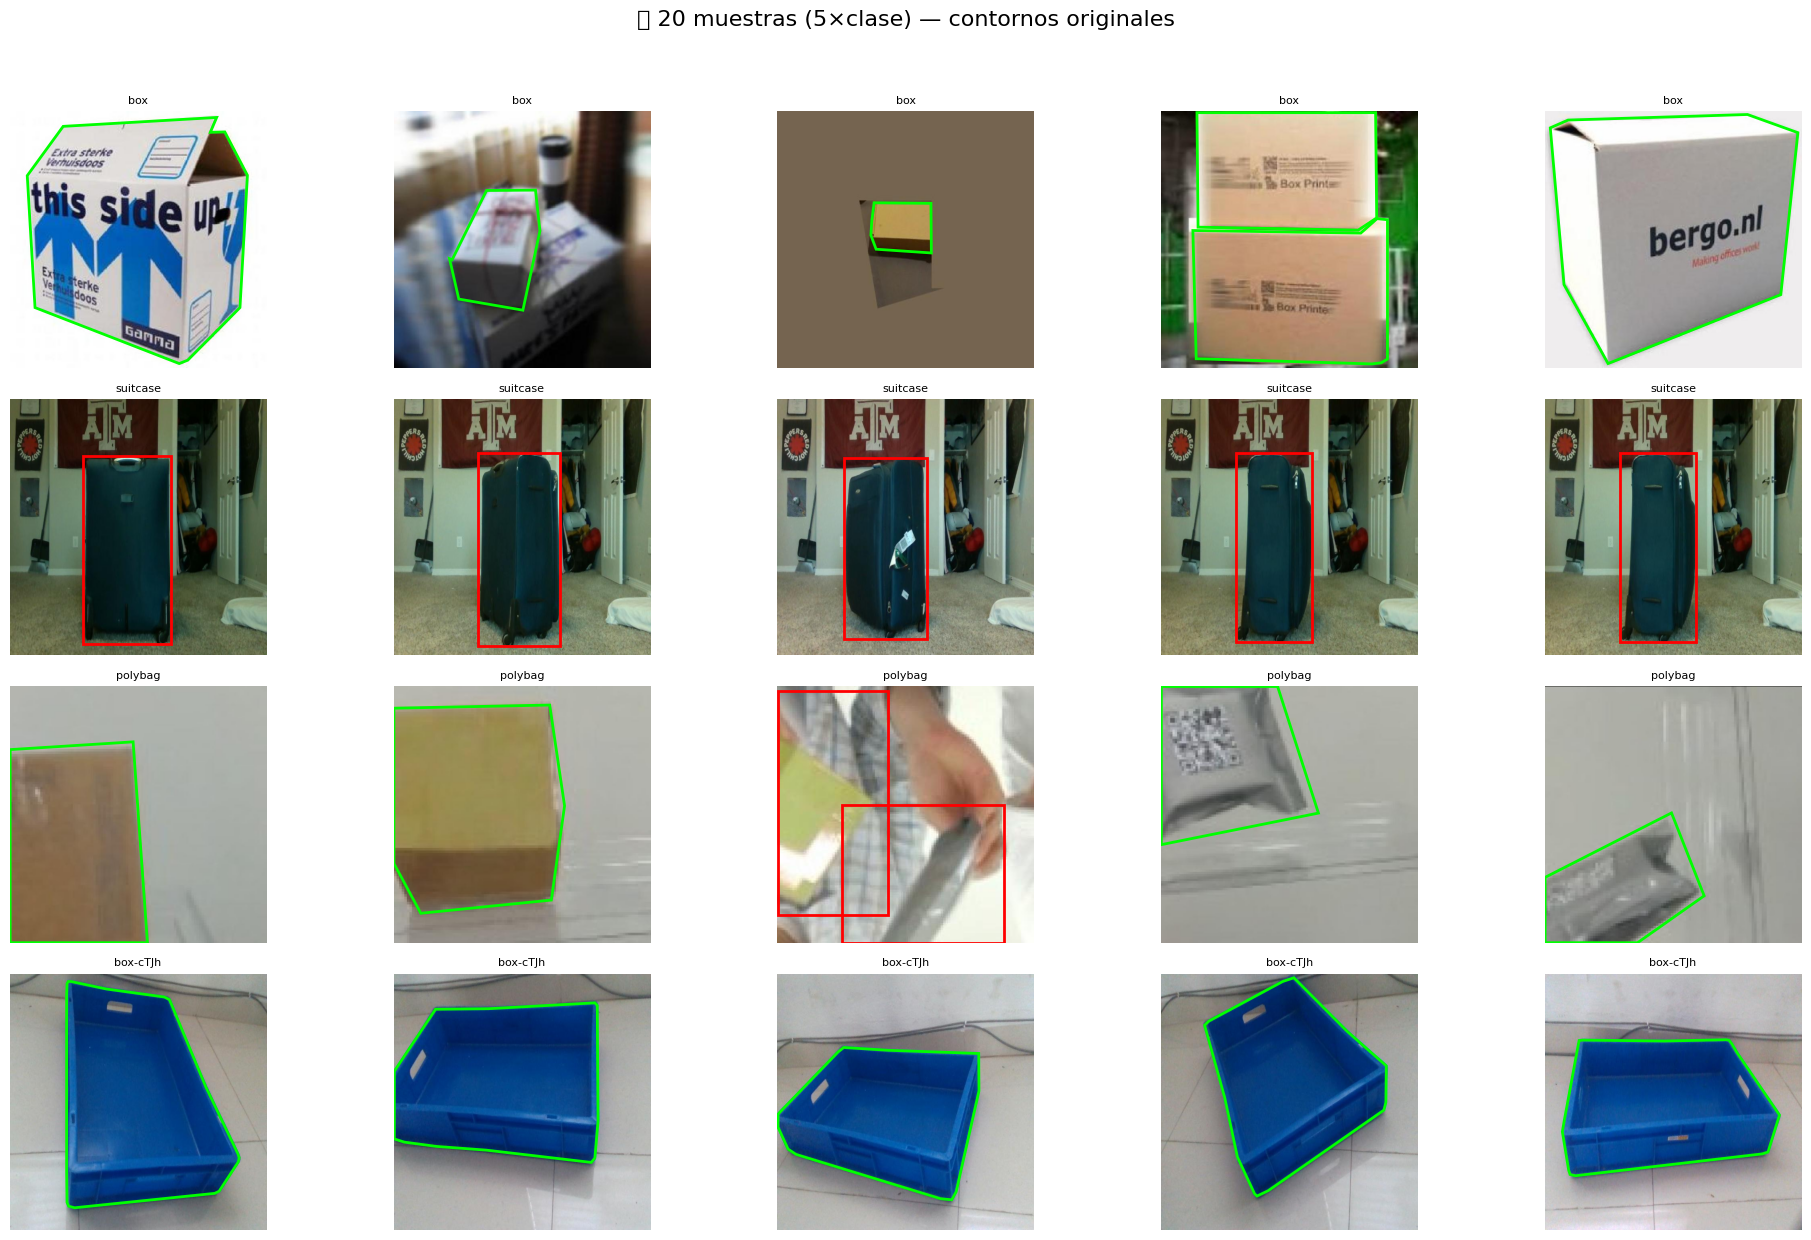

In [6]:
#Celda 5
import os, glob, random, imageio.v2 as imageio
import matplotlib.pyplot as plt

# Directorios base
IMG_DIR = os.path.join(BASE_BALANCED, "images", "train")
LBL_DIR = os.path.join(BASE_BALANCED, "labels", "train")

# Diccionarios auxiliares
by_cls = {i: [] for i in range(4)}                      # 4 clases fijas
idx_to_name = {v: k for k, v in class_idx.items()}      # class‑id → nombre legible

# Recorrer todas las etiquetas de train
for lbl_path in glob.glob(os.path.join(LBL_DIR, "*.txt")):
    with open(lbl_path) as f:
        first = f.readline().strip().split()
    if len(first) < 5:
        continue
    cls_idx = int(first[0])
    if cls_idx not in by_cls:
        continue

    base = os.path.splitext(os.path.basename(lbl_path))[0]
    # Buscar imagen con cualquier extensión
    img_candidates = glob.glob(os.path.join(IMG_DIR, base + ".*"))
    if img_candidates:
        by_cls[cls_idx].append((img_candidates[0], lbl_path))

# Verificar que hay al menos 5 muestras por clase
for c in range(4):
    if len(by_cls[c]) < 5:
        raise ValueError(f"❌ La clase {c} tiene menos de 5 ejemplos (encontrados {len(by_cls[c])}).")

# Preparar la figura
rows, cols = 4, 5
plt.figure(figsize=(20, 12))

# Cambiar la semilla cada vez para obtener imágenes aleatorias diferentes en cada ejecución
random.seed()

for cls_idx in range(rows):
    # Seleccionar 5 ejemplos aleatorios
    samples = random.sample(by_cls[cls_idx], 5)
    for j, (img_path, lbl_path) in enumerate(samples):
        ax = plt.subplot(rows, cols, cls_idx * cols + j + 1)
        img = imageio.imread(img_path)
        h0, w0 = img.shape[:2]
        ax.imshow(img)
        ax.axis("off")

        # Dibujar objetos
        with open(lbl_path) as f:
            for ln in f:
                parts = ln.strip().split()
                if len(parts) < 5:
                    continue
                cls = int(parts[0])
                coords = list(map(float, parts[1:]))

                # --- Caso 1: contorno (YOLO‑segmentación) ---
                if len(coords) >= 6 and len(coords) % 2 == 0:
                    xs = coords[0::2]
                    ys = coords[1::2]
                    xs = [x * w0 for x in xs]
                    ys = [y * h0 for y in ys]
                    poly = plt.Polygon(list(zip(xs, ys)),
                                       fill=False, lw=2, color="lime")
                    ax.add_patch(poly)

                # --- Caso 2: solo bounding box (respaldo) ---
                elif len(coords) == 4:
                    x, y, w, h = coords
                    X = (x - w / 2) * w0
                    Y = (y - h / 2) * h0
                    W = w * w0
                    H = h * h0
                    rect = plt.Rectangle((X, Y), W, H,
                                         fill=False, lw=2, color="red")
                    ax.add_patch(rect)

        ax.set_title(idx_to_name.get(cls_idx, f"Clase {cls_idx}"), fontsize=8)

plt.suptitle("🌟 20 muestras (5×clase) — contornos originales", y=1.03, fontsize=16)
plt.tight_layout()
plt.show()

In [7]:
#Celda 6 GRADIO

# Instalación de dependencias necesarias para Google Colab
!apt-get install -y libzbar0
!pip install -q gradio opencv-python Pillow pyzbar numpy ultralytics

import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import os, random, imageio.v2 as imageio
from PIL import Image, ImageDraw
import io, glob, requests, cv2, html
from ultralytics import YOLO
from pyzbar.pyzbar import decode, ZBarSymbol

# --- Función para obtener automáticamente el último modelo entrenado ---
def get_latest_model():
    paths = glob.glob('runs/detect/yolov8n_balanced_*ep*/weights/best.pt')
    valid_paths = [path for path in paths if os.path.isfile(path)]
    if not valid_paths:
        return YOLO('yolov8n.pt')
    latest_model_path = max(valid_paths, key=os.path.getctime)
    return YOLO(latest_model_path)

# --- Distribución de clases ---
def capture_class_distribution():
    path = "/content/visuals/class_distribution_all_splits.png"
    if os.path.exists(path):
        return Image.open(path)
    else:
        print("⚠️ Imagen de distribución de clases no encontrada.")
        return None

# --- Métricas por clase ---
def capture_per_class_metrics():
    path = "/content/visuals/Metricas_por_clase.png"
    if os.path.exists(path):
        return Image.open(path)
    else:
        print("⚠️ Imagen de métricas por clase no encontrada.")
        return None

# --- Muestras con límites y nombres de clase ---
def show_training_samples_with_bboxes():
    class_samples = {0: [], 1: [], 2: [], 3: []}
    for sample in train_data:
        img_name, img_path, lbl_path, cls_idx = sample
        if cls_idx in class_samples and len(class_samples[cls_idx]) < 5:
            class_samples[cls_idx].append(sample)

    for cls, samples in class_samples.items():
        if len(samples) < 5:
            print(f"⚠️ Clase {cls} tiene solo {len(samples)} muestras.")

    selected_samples = sum(class_samples.values(), [])
    images_with_bboxes = []

    for img_name, img_path, lbl_path, cls_idx in selected_samples:
        img = imageio.imread(img_path)
        h, w = img.shape[:2]
        plt.figure(figsize=(6, 4))
        plt.imshow(img)
        plt.axis("off")

        with open(lbl_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) < 5:
                    continue
                cls = int(parts[0])
                coords = list(map(float, parts[1:]))

                if len(coords) == 4:
                    x_center, y_center, box_w, box_h = coords
                    X = (x_center - box_w / 2) * w
                    Y = (y_center - box_h / 2) * h
                    W = box_w * w
                    H = box_h * h
                    rect = plt.Rectangle((X, Y), W, H, fill=False, color='lime', linewidth=2)
                    plt.gca().add_patch(rect)

                elif len(coords) >= 6 and len(coords) % 2 == 0:
                    xs = [coords[i] * w for i in range(0, len(coords), 2)]
                    ys = [coords[i] * h for i in range(1, len(coords), 2)]
                    poly = plt.Polygon(list(zip(xs, ys)), fill=False, color='cyan', linewidth=2)
                    plt.gca().add_patch(poly)

        plt.title(NAMES[cls_idx])
        buf = io.BytesIO()
        plt.savefig(buf, format='png', facecolor='white')
        buf.seek(0)
        img_with_bbox = Image.open(buf)
        images_with_bboxes.append(img_with_bbox)
        plt.close()

    return images_with_bboxes

# --- Función unificada para evitar mezcla de salidas ---
def mostrar_resultados():
    return (
        show_training_samples_with_bboxes(),
        capture_class_distribution(),
        capture_per_class_metrics()
    )

# --- Mapeo de clases ---
NAMES = [
    "cajas (Box)",
    "maletas (Suitcase)",
    "sobres (Envelope/Soft Blocks)",
    "cubetas (Bin)"
]

# --- Predicción con códigos de barras y recorte ---
def detect_barcodes(img):
    detected = decode(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))
    if not detected:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        detected = decode(Image.fromarray(gray))
    return detected

def get_container_color(img, barcode_locations):
    mask = np.zeros(img.shape[:2], np.uint8)
    for x, y, w, h in barcode_locations:
        padding = int(max(w, h) * 0.5)
        x1, y1 = max(0, x - padding), max(0, y - padding)
        x2, y2 = min(img.shape[1], x + w + padding), min(img.shape[0], y + h + padding)
        roi = img[y1:y2, x1:x2]
        if roi.size == 0:
            continue
        hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
        lower_white = np.array([0, 0, 200])
        upper_white = np.array([180, 30, 255])
        mask[y1:y2, x1:x2] = cv2.bitwise_not(cv2.inRange(hsv, lower_white, upper_white))
    if np.sum(mask) > 0:
        mean_color = cv2.mean(img, mask=mask)[:3]
        return tuple(map(int, mean_color))
    return (40, 40, 40)

def detect_container_contour(img, container_color, tolerance=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    target = cv2.cvtColor(np.uint8([[list(container_color)]]), cv2.COLOR_BGR2HSV)[0][0]
    lower = np.array([max(0, target[0] - tolerance), max(0, target[1] - 50), max(0, target[2] - 50)])
    upper = np.array([min(179, target[0] + tolerance), min(255, target[1] + 50), min(255, target[2] + 50)])
    mask = cv2.inRange(hsv, lower, upper)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25))
    closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        return max(contours, key=cv2.contourArea)
    return None

def remove_background_with_bbox(original_pil, bbox):
    x1, y1, x2, y2 = bbox
    mask = Image.new("L", original_pil.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.rectangle([x1, y1, x2, y2], fill=255)
    original_pil.putalpha(mask)
    return original_pil.crop((x1, y1, x2, y2))

def box_contains_all_labels(bbox, barcode_locs):
    x1, y1, x2, y2 = bbox
    for bx, by, bw, bh in barcode_locs:
        if not (x1 <= bx and y1 <= by and x2 >= bx + bw and y2 >= by + bh):
            return False
    return True

def predict_container(image):
    model = get_latest_model()
    img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    img_copy = img.copy()
    barcodes = detect_barcodes(img)
    if not barcodes:
        return img, "❌ No se detectaron códigos de barras", None

    barcode_texts = []
    barcode_locs = []
    for i, b in enumerate(barcodes):
        x, y, w, h = b.rect.left, b.rect.top, b.rect.width, b.rect.height
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 2)
        text = b.data.decode("utf-8")
        barcode_texts.append(text)
        cv2.putText(img, f"{text}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 255), 2)
        barcode_locs.append((x, y, w, h))

    container_color = get_container_color(img_copy, barcode_locs)
    contour = detect_container_contour(img_copy, container_color)
    if contour is None:
        return img, f"Códigos: {', '.join(barcode_texts)} | ❌ No se detectó el contenedor", None

    x, y, w, h = cv2.boundingRect(contour)
    roi = img[y:y+h, x:x+w]
    results = model.predict(roi, conf=0.25, imgsz=640)[0]

    highest_conf = 0
    final_bbox = None
    label_text = None
    for box in results.boxes:
        conf = float(box.conf.cpu().numpy())
        cls_idx = int(box.cls.cpu().numpy())
        if conf >= 0.25:
            xyxy = box.xyxy[0].cpu().numpy().astype(int)
            x1, y1, x2, y2 = xyxy
            x1 += x; y1 += y; x2 += x; y2 += y
            if not box_contains_all_labels((x1, y1, x2, y2), barcode_locs):
                continue
            label = f"{NAMES[cls_idx]} {int(conf*100)}%"
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, label, (x1+5, y1+25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
            label_text = label
            final_bbox = (x1, y1, x2, y2)
            highest_conf = conf

    result_message = f"Códigos: {', '.join(barcode_texts)}"
    if label_text:
        result_message += f" | Detectado: {label_text}"
    elif not final_bbox:
        result_message += " | ❌ No se encontró ninguna predicción válida"

    return img, result_message, final_bbox

def gradio_predict_file(image):
    processed_img, result_text, bbox = predict_container(image)
    if bbox:
        pil = image.convert("RGBA")
        result_img = remove_background_with_bbox(pil, bbox)
        return [processed_img, np.array(result_img)], result_text
    else:
        return [processed_img, np.zeros((10,10,4), dtype=np.uint8)], result_text

def gradio_predict_url(url):
    try:
        image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
        return gradio_predict_file(image)
    except:
        return [np.zeros((10,10,3), dtype=np.uint8), np.zeros((10,10,4), dtype=np.uint8)], "❌ Error de carga"

# --- Interfaz Gradio ---
with gr.Blocks() as demo:
    with gr.Tabs():
        with gr.TabItem("Muestras y Métricas por Clase"):
            gr.Markdown("## 🔍 Muestras y Métricas por Clase")
            btn = gr.Button("📊 Mostrar Resultados")
            gr.Markdown("### 🖼️ Imagen de muestra: 20 imágenes (5 por cada clase) con límites y nombres de clase")
            gallery = gr.Gallery(columns=4, label="Muestras con límites")
            gr.Markdown("### 📊 Distribución de clases en el dataset de entrenamiento")
            dist_plot = gr.Image()
            gr.Markdown("### 📈 Métricas por clase")
            metrics_plot = gr.Image()
            btn.click(mostrar_resultados, [], [gallery, dist_plot, metrics_plot])

        with gr.TabItem("Predicción (Archivo)"):
            file_in = gr.Image(type="pil")
            file_btn = gr.Button("Predecir")
            file_out = gr.Gallery(label="Resultado")
            file_txt = gr.Textbox()
            file_btn.click(gradio_predict_file, [file_in], [file_out, file_txt])

        with gr.TabItem("Predicción (URL)"):
            url_in = gr.Textbox()
            url_btn = gr.Button("Predecir")
            url_out = gr.Gallery(label="Resultado")
            url_txt = gr.Textbox()
            url_btn.click(gradio_predict_url, [url_in], [url_out, url_txt])

demo.launch(share=True)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common libdjvulibre-text libdjvulibre21 libfftw3-double3
  libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libjxr-tools libjxr0
  liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x libfftw3-bin libfftw3-dev inkscape poppler-utils
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common libdjvulibre-text libdjvulibre21 libfftw3-